In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import math
from sklearn.preprocessing import normalize
from scipy.spatial import distance

# Loading the data

In [38]:
datasetA_X = pd.read_csv('Set-A.X.csv')
datasetA_Y = pd.read_csv('Set-A.y.csv',names=['Pred'])

# Exploring the data

In [39]:
datasetA_X.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


In [40]:
datasetA_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 19 columns):
amount        94682 non-null float64
hour1         94682 non-null int64
state1        94682 non-null object
zip1          94682 non-null int64
field1        94682 non-null int64
domain1       94681 non-null object
field2        94682 non-null int64
hour2         94682 non-null int64
flag1         94682 non-null int64
total         94682 non-null float64
field3        94682 non-null int64
field4        94682 non-null int64
field5        94682 non-null int64
indicator1    94682 non-null int64
indicator2    94682 non-null int64
flag2         94682 non-null int64
flag3         94682 non-null int64
flag4         94682 non-null int64
flag5         94682 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 13.7+ MB


In [41]:
datasetA_X.describe()

,amount,hour1,zip1,field1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
count,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000
mean,25.635312,13.864726,543.243742,2.419203,0.425561,13.875858,0.546989,25.626179,714.512653,13.984115,1.375689,0.113306,0.018367,0.541127,0.401185,0.019888,6.176676
std,14.190485,5.263233,315.373801,1.003760,0.494430,5.258338,0.497790,14.198761,3919.325076,6.516851,2.423941,0.316968,0.134274,0.498308,0.490141,0.139615,102.977443
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32265.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.950000,10.000000,282.000000,2.000000,0.000000,11.000000,0.000000,12.950000,-1551.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.900000,14.000000,530.000000,3.000000,0.000000,14.000000,1.000000,25.900000,1455.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,38.850000,18.000000,891.000000,3.000000,1.000000,18.000000,1.000000,38.850000,3598.000000,19.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,95.400000,23.000000,999.000000,4.000000,1.000000,23.000000,1.000000,95.400000,8193.000000,46.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000


In [42]:
datasetA_X.shape

(94682, 19)

In [43]:
datasetA_Y.describe()

,Pred
count,94682.000000
mean,0.022116
std,0.147062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [44]:
datasetA_Y.sum()

Pred    2094
dtype: int64

In [45]:
datasetA_Y['Pred'].isnull().values.sum()

0

# Dealing with null values

In [46]:
datasetA_X['domain1'].isnull().values.sum()

1

In [47]:
#unique categories
datasetA_X['domain1'].value_counts().head()

AOL.COM        16451
YAHOO.COM      15814
HOTMAIL.COM    11544
MSN.COM         4029
COMCAST.NET     3918
Name: domain1, dtype: int64

In [48]:
 datasetA_X['domain1']=datasetA_X['domain1'].fillna('AOL.COM')

In [49]:
datasetA_X['domain1'].isnull().values.sum()

0

# Inserting dummy variables

In [50]:
labels = datasetA_X['domain1'].astype('category').cat.categories.tolist()
replace_map_comp = {'domain1' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
datasetA_X.replace(replace_map_comp, inplace=True)
datasetA_X['domain1'].astype('int64')[:5]

0     277
1     277
2    3022
3     277
4    9147
Name: domain1, dtype: int64

In [51]:
labels1 = datasetA_X['state1'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'state1' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}
datasetA_X.replace(replace_map_comp1, inplace=True)
datasetA_X['state1'].astype('int64')[:5]

0     7
1     7
2     7
3    34
4     7
Name: state1, dtype: int64

In [52]:
datasetA_X.tail()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
94677,38.85,20,25,481,3,277,1,20,0,38.85,-5821,6,2,0,0,1,1,0,3
94678,12.95,16,13,300,2,3022,0,16,1,12.95,182,9,9,0,0,1,1,0,1
94679,38.85,5,7,906,2,277,1,5,0,38.85,-2914,8,2,0,0,1,1,0,3
94680,38.85,6,37,105,2,277,0,6,0,38.85,1530,7,2,0,0,1,1,0,1
94681,38.85,19,6,857,2,277,0,19,0,38.85,-676,8,2,0,0,1,1,0,4


In [53]:
datasetA_Y.tail()

,Pred
94677,0
94678,0
94679,1
94680,1
94681,1


# Correlation

In [54]:
CORR=datasetA_X.corrwith(datasetA_Y['Pred'],0).abs()
CORR

amount        0.023544
hour1         0.161298
state1        0.016710
zip1          0.023073
field1        0.091811
domain1       0.005172
field2        0.004085
hour2         0.159964
flag1         0.024728
total         0.023827
field3        0.065734
field4        0.056951
field5        0.023001
indicator1    0.017840
indicator2    0.002963
flag2         0.007765
flag3         0.079112
flag4         0.039792
flag5         0.078440
dtype: float64

# Merging X and Y

In [55]:
datasetA=datasetA_X
datasetA['Pred']=datasetA_Y['Pred']
datasetA['Pred'].astype('int64')
datasetA.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,Pred
0,12.95,0,7,925,3,277,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,7,925,3,277,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,7,928,3,3022,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,34,77,0,277,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,7,945,3,9147,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0


# Splitting the data

In [56]:
trainA, testA = train_test_split(datasetA, test_size=0.2)

In [57]:
trainA_X=trainA.iloc[:,0:-1]
trainA_Y=trainA.iloc[:,-1:]

In [58]:
testA_X=testA.iloc[:,0:-1]
testA_Y=testA.iloc[:,-1:]

# Normalizing the data (min-max)

In [59]:
norm_trainA=(trainA-trainA.min())/(trainA.max()-trainA.min())

In [60]:
norm_trainA.shape

(75745, 20)

In [61]:
norm_testA=(testA-testA.min())/(testA.max()-testA.min())

In [62]:
norm_testA.shape

(18937, 20)

# Logistic regression

In [63]:
X_trainA=norm_trainA.iloc[:,0:-1]
ones = np.ones([X_trainA.shape[0],1])
X_trainA = np.concatenate((ones,X_trainA),axis=1)

y_trainA = norm_trainA.iloc[:,-1:].values

In [136]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def computeCost(x, y,theta):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

In [137]:
def minigradientDescent(X,y,theta,iters,alpha):
    #cost = np.zeros(iters)
    for i in range(iters):
        for n in range(0,len(X),128):
            m = 128
            grad= (1 / m) * np.dot(X[n:(n+128)].T, sigmoid(net_input(theta,   X[n:(n+128)])) - y[n:(n+128)])

            theta = theta - (alpha * grad)

            cost = computeCost(X[n:(n+128)], y[n:(n+128)], theta)
    return theta,cost

In [138]:
alpha=0.1
iters=100
theta = np.zeros((X_trainA.shape[1],1))

In [139]:
kf = KFold(n_splits = 10, random_state = None, shuffle = False)
accuracy_list = []
tc = []
for train_in, test_in in kf.split(X_trainA):
    x = X_trainA[train_in]
    y = y_trainA[train_in]
    x_te = X_trainA[test_in]
    y_te = y_trainA[test_in]
    theta, cost = minigradientDescent(x,y,theta,iters,alpha)
    
    y_pred = probability(theta, x_te)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<=0.5]=0
    
    TP=0;FN=0;FP=0;TN=0
    for i in range(0,len(y_pred)):
        if ((y_pred[i]==1)&(y_te[i]==1)):
            TP=TP+1
        if ((y_pred[i]==0)&(y_te[i]==1)):
            FN=FN+1
        if ((y_pred[i]==1)&(y_te[i]==0)):
            FP=FP+1
        if ((y_pred[i]==0)&(y_te[i]==0)):
            TN=TN+1

    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    accuracy_list.append(Accuracy)

In [140]:
accuracy_list

[0.9805940594059406,
 0.9782178217821782,
 0.9786138613861386,
 0.9786138613861386,
 0.9761056105610562,
 0.9804594665962504,
 0.9791391602851862,
 0.9775547927119091,
 0.9795352521785055,
 0.980063374702931]

In [142]:
alpha=0.1
iters=500
theta = np.zeros((X_trainA.shape[1],1))

In [143]:
#running the gd and cost function
g,cost = minigradientDescent(X_trainA,y_trainA,theta,iters,alpha)
print(g)
print(g.shape)

[[-0.00593337]
 [-0.36066035]
 [-2.98757746]
 [-0.11455779]
 [ 0.15916126]
 [ 3.51630082]
 [ 0.11149554]
 [-0.04223945]
 [-1.57097341]
 [-0.79121057]
 [-0.25099709]
 [-4.32401763]
 [-3.51906469]
 [ 0.75238544]
 [ 0.45940518]
 [ 0.23504717]
 [-0.539008  ]
 [ 1.29418205]
 [ 0.56853716]
 [ 1.34778485]]
(20, 1)


In [144]:
X_testA=norm_testA.iloc[:,0:-1]
ones = np.ones([X_testA.shape[0],1])
X_testA = np.concatenate((ones,X_testA),axis=1)

y_testA = norm_testA.iloc[:,-1:].values

In [145]:
test_prob=probability(g,X_testA)

In [146]:
test_pred=np.copy(test_prob)
test_pred[test_pred>0.5]=1
test_pred[test_pred<=0.5]=0

In [192]:
def confuse(y_act,y_pred):
    TP=0;FN=0;FP=0;TN=0
    for i in range(0,len(y_pred)):
        if ((y_pred[i]==1)&(y_act[i]==1)):
            TP=TP+1
        if ((y_pred[i]==0)&(y_act[i]==1)):
            FN=FN+1
        if ((y_pred[i]==1)&(y_act[i]==0)):
            FP=FP+1
        if ((y_pred[i]==0)&(y_act[i]==0)):
            TN=TN+1

    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    print("Accuracy:",Accuracy)

    print("Confusion matrix:")
    print("TP: ",TP,"FN:",FN)
    print("FP: ",FP,"TN:",TN)

    precision=TP/(TP+FP)
    print("Precision:",precision)

    recall=TP/(TP+FN)
    print("Recall:",recall)

    if (TP!=0):
        f1=(2*precision*recall)/(precision+recall)
        print("F1 score:",f1)

    TPR=TP/(TP+FN)
    print("TPR:",TPR)
    FPR=FP/(FP+TN)
    print("FPR:",FPR)

def roc(y_act,probs):
    fpr, tpr, thresholds = metrics.roc_curve(y_act, probs)

    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [148]:
confuse(y_testA,test_pred)

Accuracy: 0.9797750435655067
Confusion matrix:
TP:  56 FN: 355
FP:  28 TN: 18498
Precision: 0.6666666666666666
Recall: 0.1362530413625304
F1 score: 0.22626262626262628
TPR: 0.1362530413625304
FPR: 0.001511389398682932


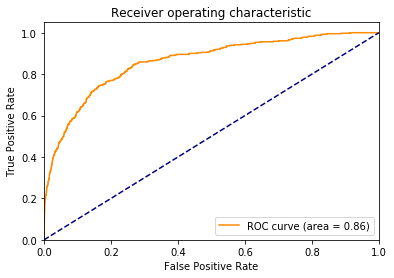

In [149]:
roc(y_testA,test_prob)

In [150]:
train_prob= probability(g,X_trainA)

In [151]:
train_pred=np.copy(train_prob)
train_pred[train_pred>0.5]=1
train_pred[train_pred<=0.5]=0

In [152]:
np.unique(test_pred,return_counts=True)

(array([0., 1.]), array([18853,    84], dtype=int64))

In [153]:
confuse(y_trainA,test_pred)

Accuracy: 0.9741247293657919
Confusion matrix:
TP:  2 FN: 408
FP:  82 TN: 18445
Precision: 0.023809523809523808
Recall: 0.004878048780487805
F1 score: 0.008097165991902834
TPR: 0.004878048780487805
FPR: 0.00442597290440978


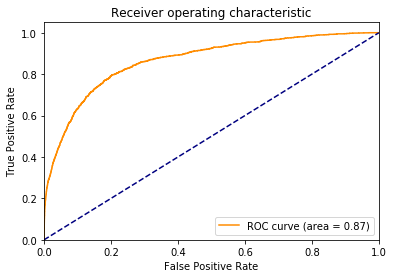

In [155]:
roc(y_trainA,train_prob)

There is no sign of overfitting as the accuracy over training and teting data are both high.

To deal with skewed distribution I would adopt 2 methods:
1. Use cost matrix
OR
2. Reduce data to make sure that positive category is atleast a significant portion ,say 30% 

# Naive Bayes Classifier

In [159]:
#number of zeros and ones in Y
pred_zeros=trainA_Y['Pred'].value_counts()[0]
pred_ones=trainA_Y['Pred'].value_counts()[1]

In [160]:
# "Amount" column
amount_mean_zeros = trainA_X.iloc[(trainA_Y['Pred']==0).values.tolist(),[0]].mean()
amount_std_zeros = trainA_X.iloc[(trainA_Y['Pred']==0).values.tolist(),[0]].std()

amount_mean_ones = trainA_X.iloc[(trainA_Y['Pred']==1).values.tolist(),[0]].mean()
amount_std_ones = trainA_X.iloc[(trainA_Y['Pred']==1).values.tolist(),[0]].std()

# "Total" column
total_mean_zeros = trainA_X.iloc[(trainA_Y['Pred']==0).values.tolist(),[9]].mean()
total_std_zeros = trainA_X.iloc[(trainA_Y['Pred']==0).values.tolist(),[9]].std()

total_mean_ones = trainA_X.iloc[(trainA_Y['Pred']==1).values.tolist(),[9]].mean()
total_std_ones = trainA_X.iloc[(trainA_Y['Pred']==1).values.tolist(),[9]].std()

In [161]:
overall_freq_dict={}
overall_prob_dict={}
k_list = {}

for i in range(0,trainA_X.shape[1]):
    if ((i!=0)&(i!=9)):
        unique1, counts1 = np.unique(trainA_X.iloc[(trainA_Y['Pred']==0).values.tolist(),[i]], return_counts=True)
        unique2, counts2 = np.unique(trainA_X.iloc[(trainA_Y['Pred']==1).values.tolist(),[i]], return_counts=True)
        
        k = len(trainA_X.iloc[:,i].unique())
        
        d1=dict(zip(unique1,counts1))
        d2=dict(zip(unique2,counts2))
        
        freq_dict={}
        for key in d1:
            if key in d2:
                freq_dict[key]=(d1[key],d2[key])
            else:
                freq_dict[key]=(d1[key],0)
        for key in d2:
            if key in d1:
                freq_dict[key]=(d1[key],d2[key])
            else:
                freq_dict[key]=(0,d2[key])
        
        probs1 = (counts1 + 1) / (pred_zeros + k)
        probs2 = (counts2 + 1) / (pred_ones + k)
        
        p1=dict(zip(unique1,probs1))
        p2=dict(zip(unique2,probs2))
        
        prob_dict={}
        for key in p1:
            if key in p2:
                prob_dict[key]=(p1[key],p2[key])
            else:
                prob_dict[key]=(p1[key],0)
        for key in p2:
            if key in p1:
                prob_dict[key]=(p1[key],p2[key])
            else:
                prob_dict[key]=(0,p2[key])
        
        overall_freq_dict[i] = freq_dict
        overall_prob_dict[i] = prob_dict
        
        k_list[i] = k

In [ ]:
kf = KFold(n_splits = 5, random_state = None, shuffle = False)

for train_in, test_in in kf.split(trainA_X):
    x = trainA_X.iloc[train_in,:]
    y = trainA_Y.iloc[train_in,:]
    x_te = trainA_X.iloc[test_in,:]
    y_te = trainA_Y.iloc[test_in,:]
    
    print(type(x))
    
    overall_freq_dict={}
    overall_prob_dict={}
    k_list = {}

    for i in range(0,x.shape[1]):
        if ((i!=0)&(i!=9)):
            unique1, counts1 = np.unique(x.iloc[(y['Pred']==0).values.tolist(),[i]], return_counts=True)
            unique2, counts2 = np.unique(x.iloc[(y['Pred']==1).values.tolist(),[i]], return_counts=True)

            k = len(x.iloc[:,i].unique())

            d1=dict(zip(unique1,counts1))
            d2=dict(zip(unique2,counts2))

            freq_dict={}
            for key in d1:
                if key in d2:
                    freq_dict[key]=(d1[key],d2[key])
                else:
                    freq_dict[key]=(d1[key],0)
            for key in d2:
                if key in d1:
                    freq_dict[key]=(d1[key],d2[key])
                else:
                    freq_dict[key]=(0,d2[key])

            probs1 = (counts1 + 1) / (pred_zeros + k)
            probs2 = (counts2 + 1) / (pred_ones + k)

            p1=dict(zip(unique1,probs1))
            p2=dict(zip(unique2,probs2))

            prob_dict={}
            for key in p1:
                if key in p2:
                    prob_dict[key]=(p1[key],p2[key])
                else:
                    prob_dict[key]=(p1[key],0)
            for key in p2:
                if key in p1:
                    prob_dict[key]=(p1[key],p2[key])
                else:
                    prob_dict[key]=(0,p2[key])

            overall_freq_dict[i] = freq_dict
            overall_prob_dict[i] = prob_dict

            k_list[i] = k

    prob_zero_list=[]
    for row_index in range(0,x_te.shape[0]):
        prob_zero = 0
        for col_index in range(0,x_te.shape[1]):
            value = x_te.iloc[row_index][col_index]
            if ((col_index!=0)&(col_index!=9)):
                if value in overall_prob_dict[col_index]:
                    if overall_freq_dict[col_index][value][0]!=0:
                        prob_zero = prob_zero + math.log(overall_prob_dict[col_index][value][0]) #for pred = 0
                    else:
                        prob_zero = prob_zero + math.log(1 / (pred_zeros + k_list[col_index]))
                else:
                    prob_zero = prob_zero + math.log(1 / (pred_zeros + k_list[col_index]))
            elif (col_index==0):
                prob_zero = prob_zero + math.log((1/math.sqrt(2*math.pi*pow(amount_std_zeros,2))) * math.exp(-(pow(value-amount_mean_zeros,2)/(2*pow(amount_std_zeros,2)))))
            elif (col_index==9):
                prob_zero = prob_zero + math.log((1/math.sqrt(2*math.pi*pow(total_std_zeros,2))) * math.exp(-(pow(value-total_mean_zeros,2)/(2*pow(total_std_zeros,2)))))

        prob_zero = prob_zero + math.log(pred_zeros/(pred_zeros+pred_ones))
        prob_zero_list.append(prob_zero)

    prob_one_list=[]
    for row_index in range(0,x_te.shape[0]):
        prob_one = 0
        for col_index in range(0,x_te.shape[1]):
            value = x_te.iloc[row_index][col_index]
            if ((col_index!=0)&(col_index!=9)):
                if value in overall_prob_dict[col_index]:
                    if overall_freq_dict[col_index][value][1]!=0:
                        prob_one = prob_one + math.log(overall_prob_dict[col_index][value][1]) #for pred = 1
                    else:
                        prob_one = prob_one + math.log(1 / (pred_ones + k_list[col_index]))
                else:
                    prob_one = prob_one + math.log(1 / (pred_ones + k_list[col_index]))
            elif (col_index==0):
                prob_one = prob_one + math.log((1/math.sqrt(2*math.pi*pow(amount_std_ones,2))) * math.exp(-(pow(value-amount_mean_ones,2)/(2*pow(amount_std_ones,2)))))
            elif (col_index==9):
                prob_one = prob_one + math.log((1/math.sqrt(2*math.pi*pow(total_std_ones,2))) * math.exp(-(pow(value-total_mean_ones,2)/(2*pow(total_std_ones,2)))))

        prob_one = prob_one + math.log(pred_ones/(pred_zeros+pred_ones))
        prob_one_list.append(prob_one)

    prob_zero_np = np.asarray(prob_zero_list)
    prob_one_np = np.asarray(prob_one_list)

    test_pred_nb=np.zeros([x_te.shape[0]])

    test_pred_nb[prob_zero_np>prob_one_np]=0
    test_pred_nb[prob_zero_np<prob_one_np]=1

    np.unique(test_pred_nb,return_counts=True)

    confuse(y_te,test_pred_nb)

In [162]:
prob_zero_list=[]
for row_index in range(0,testA_X.shape[0]):
    prob_zero = 0
    for col_index in range(0,testA_X.shape[1]):
        value = testA_X.iloc[row_index][col_index]
        if ((col_index!=0)&(col_index!=9)):
            if value in overall_prob_dict[col_index]:
                if overall_freq_dict[col_index][value][0]!=0:
                    prob_zero = prob_zero + math.log(overall_prob_dict[col_index][value][0]) #for pred = 0
                else:
                    prob_zero = prob_zero + math.log(1 / (pred_zeros + k_list[col_index]))
            else:
                prob_zero = prob_zero + math.log(1 / (pred_zeros + k_list[col_index]))
        elif (col_index==0):
            prob_zero = prob_zero + math.log((1/math.sqrt(2*math.pi*pow(amount_std_zeros,2))) * math.exp(-(pow(value-amount_mean_zeros,2)/(2*pow(amount_std_zeros,2)))))
        elif (col_index==9):
            prob_zero = prob_zero + math.log((1/math.sqrt(2*math.pi*pow(total_std_zeros,2))) * math.exp(-(pow(value-total_mean_zeros,2)/(2*pow(total_std_zeros,2)))))
        
    prob_zero = prob_zero + math.log(pred_zeros/(pred_zeros+pred_ones))
    prob_zero_list.append(prob_zero)

In [163]:
prob_one_list=[]
for row_index in range(0,testA_X.shape[0]):
    prob_one = 0
    for col_index in range(0,testA_X.shape[1]):
        value = testA_X.iloc[row_index][col_index]
        if ((col_index!=0)&(col_index!=9)):
            if value in overall_prob_dict[col_index]:
                if overall_freq_dict[col_index][value][1]!=0:
                    prob_one = prob_one + math.log(overall_prob_dict[col_index][value][1]) #for pred = 1
                else:
                    prob_one = prob_one + math.log(1 / (pred_ones + k_list[col_index]))
            else:
                prob_one = prob_one + math.log(1 / (pred_ones + k_list[col_index]))
        elif (col_index==0):
            prob_one = prob_one + math.log((1/math.sqrt(2*math.pi*pow(amount_std_ones,2))) * math.exp(-(pow(value-amount_mean_ones,2)/(2*pow(amount_std_ones,2)))))
        elif (col_index==9):
            prob_one = prob_one + math.log((1/math.sqrt(2*math.pi*pow(total_std_ones,2))) * math.exp(-(pow(value-total_mean_ones,2)/(2*pow(total_std_ones,2)))))

    prob_one = prob_one + math.log(pred_ones/(pred_zeros+pred_ones))
    prob_one_list.append(prob_one)

In [164]:
prob_zero_np = np.asarray(prob_zero_list)
prob_one_np = np.asarray(prob_one_list)

In [165]:
test_pred_nb=np.zeros([testA_X.shape[0]])

In [166]:
test_pred_nb[prob_zero_np>prob_one_np]=0
test_pred_nb[prob_zero_np<prob_one_np]=1

In [167]:
np.unique(test_pred_nb,return_counts=True)

(array([0., 1.]), array([18600,   337], dtype=int64))

In [168]:
confuse(y_testA,test_pred_nb)

Accuracy: 0.974441569414374
Confusion matrix:
TP:  132 FN: 279
FP:  205 TN: 18321
Precision: 0.3916913946587537
Recall: 0.32116788321167883
F1 score: 0.3529411764705882
TPR: 0.32116788321167883
FPR: 0.011065529526071467


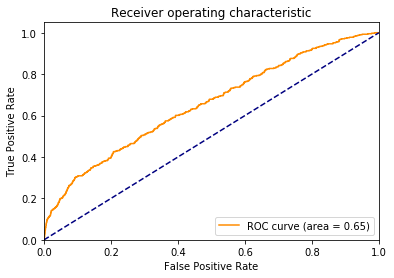

In [169]:
roc(y_testA,prob_one_np)

In [174]:
prob_zero_list=[]
for row_index in range(0,trainA_X.shape[0]):
    prob_zero = 0
    for col_index in range(0,trainA_X.shape[1]):
        value = trainA_X.iloc[row_index][col_index]
        if ((col_index!=0)&(col_index!=9)):
            if value in overall_prob_dict[col_index]:
                if overall_freq_dict[col_index][value][0]!=0:
                    prob_zero = prob_zero + math.log(overall_prob_dict[col_index][value][0]) #for pred = 0
                else:
                    prob_zero = prob_zero + math.log(1 / (pred_zeros + k_list[col_index]))
            else:
                prob_zero = prob_zero + math.log(1 / (pred_zeros + k_list[col_index]))
        elif (col_index==0):
            prob_zero = prob_zero + math.log((1/math.sqrt(2*math.pi*pow(amount_std_zeros,2))) * math.exp(-(pow(value-amount_mean_zeros,2)/(2*pow(amount_std_zeros,2)))))
        elif (col_index==9):
            prob_zero = prob_zero + math.log((1/math.sqrt(2*math.pi*pow(total_std_zeros,2))) * math.exp(-(pow(value-total_mean_zeros,2)/(2*pow(total_std_zeros,2)))))
        
    prob_zero = prob_zero + math.log(pred_zeros/(pred_zeros+pred_ones))
    prob_zero_list.append(prob_zero)

In [175]:
prob_one_list=[]
for row_index in range(0,trainA_X.shape[0]):
    prob_one = 0
    for col_index in range(0,trainA_X.shape[1]):
        value = trainA_X.iloc[row_index][col_index]
        if ((col_index!=0)&(col_index!=9)):
            if value in overall_prob_dict[col_index]:
                if overall_freq_dict[col_index][value][1]!=0:
                    prob_one = prob_one + math.log(overall_prob_dict[col_index][value][1]) #for pred = 1
                else:
                    prob_one = prob_one + math.log(1 / (pred_ones + k_list[col_index]))
            else:
                prob_one = prob_one + math.log(1 / (pred_ones + k_list[col_index]))
        elif (col_index==0):
            prob_one = prob_one + math.log((1/math.sqrt(2*math.pi*pow(amount_std_ones,2))) * math.exp(-(pow(value-amount_mean_ones,2)/(2*pow(amount_std_ones,2)))))
        elif (col_index==9):
            prob_one = prob_one + math.log((1/math.sqrt(2*math.pi*pow(total_std_ones,2))) * math.exp(-(pow(value-total_mean_ones,2)/(2*pow(total_std_ones,2)))))

    prob_one = prob_one + math.log(pred_ones/(pred_zeros+pred_ones))
    prob_one_list.append(prob_one)

In [176]:
prob_zero_np = np.asarray(prob_zero_list)
prob_one_np = np.asarray(prob_one_list)

In [177]:
train_pred_nb=np.zeros([trainA_X.shape[0]])

In [178]:
train_pred_nb[prob_zero_np>prob_one_np]=0
train_pred_nb[prob_zero_np<prob_one_np]=1

In [179]:
np.unique(train_pred_nb,return_counts=True)

(array([0., 1.]), array([74121,  1624], dtype=int64))

In [180]:
confuse(y_trainA,train_pred_nb)

Accuracy: 0.9750874645191102
Confusion matrix:
TP:  710 FN: 973
FP:  914 TN: 73148
Precision: 0.437192118226601
Recall: 0.42186571598336303
F1 score: 0.42939219836710013
TPR: 0.42186571598336303
FPR: 0.012341011584888336


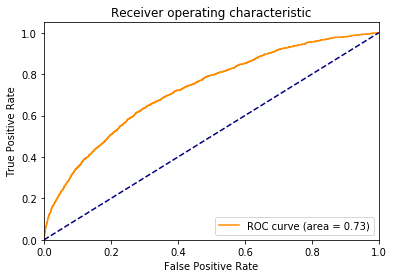

In [182]:
roc(y_trainA,prob_one_np)

There is no sign of overfitting as the accuracy over training and teting data are both high.

To deal with skewed distribution I would adopt 2 methods:
1. Use cost matrix
OR
2. Reduce data to make sure that positive category is atleast a significant portion ,say 30% 

# kNN Classifier

In [31]:
print(trainA_X.shape)
trainA_X.head()

(75745, 19)


,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
88069,31.08,12,38,446,0,9147,0,12,0,31.08,-13711,16,0,0,0,0,0,0,1
12884,25.90,17,6,852,3,1133,0,17,0,25.90,-1570,17,0,1,0,1,1,0,1
4139,12.95,21,30,282,3,9147,0,21,1,12.95,582,11,4,0,0,0,0,0,1
27967,49.95,15,37,112,3,277,1,15,1,49.95,6035,11,0,1,0,1,1,0,1
12526,0.00,13,30,274,4,9147,1,13,0,0.00,-3054,18,2,0,0,0,0,0,1


In [32]:
print(testA_X.shape)
testA_X.head()

(18937, 19)


,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
92127,12.95,19,8,804,4,4236,0,19,0,12.95,4446,7,3,0,0,1,1,0,1
69174,12.95,17,7,951,2,3022,0,17,0,12.95,5179,20,2,0,0,1,0,0,1
70463,38.85,17,7,917,2,3243,0,17,1,38.85,3874,6,0,0,0,0,0,0,1
70230,10.36,15,7,946,3,4997,0,15,0,10.36,-1980,19,0,1,0,1,1,0,1
11672,25.90,17,7,989,0,3022,0,17,1,25.90,3696,7,0,0,0,0,0,0,1


In [33]:
train_red_no = 9000

trainA_np=np.zeros((train_red_no,trainA_X.shape[1]))
for train_row_index in range(0,train_red_no):
    trainA_sample_np = trainA_X.iloc[train_row_index,:].values
    trainA_np[train_row_index] = trainA_sample_np / np.linalg.norm(trainA_sample_np)

In [ ]:
knn_table={}
for test_row_index in range(0,testA_X.shape[0]):
    
    testA_sample_np = testA_X.iloc[test_row_index,:].values
    testA_sample_np = testA_sample_np / np.linalg.norm(testA_sample_np)
    
    knn_table[test_row_index] = []
    
    for train_row_index in range(0,train_red_no):
        
        d = distance.euclidean(trainA_np[train_row_index],testA_sample_np)
        c = trainA_Y.iloc[train_row_index,:].values[0]
        
        knn_table[test_row_index].append((d,c))

In [35]:
for test_row_index in knn_table:
    knn_table[test_row_index] = sorted(knn_table[test_row_index], key=lambda tup: tup[0])

In [203]:
for k in range(1,11):
    pred_knn = []

    for test_index in range(0,testA_X.shape[0]):
        zero_count = 0
        one_count = 0

        for count in range(0,k):
            if(knn_table[test_index][count][1]==0):
                zero_count = zero_count + 1
            else:
                one_count = one_count + 1

        if (zero_count > one_count):
            pred_knn.append(0)
        else:
            pred_knn.append(1)
            
    TP=0;FN=0;FP=0;TN=0
    for i in range(0,len(pred_knn)):
        if ((pred_knn[i]==1)&(y_testA[i]==1)):
            TP=TP+1
        if ((pred_knn[i]==0)&(y_testA[i]==1)):
            FN=FN+1
        if ((pred_knn[i]==1)&(y_testA[i]==0)):
            FP=FP+1
        if ((pred_knn[i]==0)&(y_testA[i]==0)):
            TN=TN+1

    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    print("K value:",k,"Accuracy:",Accuracy)
    
    print("Confusion matrix:")
    print("TP: ",TP,"FN:",FN)
    print("FP: ",FP,"TN:",TN)

K value: 1 Accuracy: 0.9575962401647569
Confusion matrix:
TP:  7 FN: 404
FP:  399 TN: 18127
K value: 2 Accuracy: 0.9390082906479379
Confusion matrix:
TP:  12 FN: 399
FP:  756 TN: 17770
K value: 3 Accuracy: 0.9752864762105931
Confusion matrix:
TP:  1 FN: 410
FP:  58 TN: 18468
K value: 4 Accuracy: 0.9719596557004806
Confusion matrix:
TP:  2 FN: 409
FP:  122 TN: 18404
K value: 5 Accuracy: 0.9773987432011406
Confusion matrix:
TP:  1 FN: 410
FP:  18 TN: 18508
K value: 6 Accuracy: 0.9769762898030311
Confusion matrix:
TP:  1 FN: 410
FP:  26 TN: 18500
K value: 7 Accuracy: 0.9782964566721234
Confusion matrix:
TP:  0 FN: 411
FP:  0 TN: 18526
K value: 8 Accuracy: 0.9782436499973597
Confusion matrix:
TP:  0 FN: 411
FP:  1 TN: 18525
K value: 9 Accuracy: 0.9782964566721234
Confusion matrix:
TP:  0 FN: 411
FP:  0 TN: 18526
K value: 10 Accuracy: 0.9782964566721234
Confusion matrix:
TP:  0 FN: 411
FP:  0 TN: 18526


In [201]:
k = 1
pred_knn = []

for test_index in range(0,testA_X.shape[0]):
    zero_count = 0
    one_count = 0

    for count in range(0,k):
        if(knn_table[test_index][count][1]==0):
            zero_count = zero_count + 1
        else:
            one_count = one_count + 1

    if (zero_count > one_count):
        pred_knn.append(0)
    else:
        pred_knn.append(1)

In [202]:
confuse(y_testA,pred_knn)

Accuracy: 0.9575962401647569
Confusion matrix:
TP:  7 FN: 404
FP:  399 TN: 18127
Precision: 0.017241379310344827
Recall: 0.0170316301703163
F1 score: 0.017135862913096697
TPR: 0.0170316301703163
FPR: 0.021537298931231783


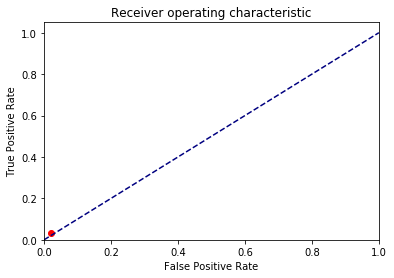

In [199]:
plt.figure()
plt.plot(0.021212284773573703, 0.03170731707317073, 'ro')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

There is no sign of overfitting as the accuracy over training and testing data are both high.

To deal with skewed distribution I would adopt 2 methods:
1. Use cost matrix
OR
2. Reduce data to make sure that positive category is atleast a significant portion ,say 30% 

I would pick logistic regression because:
    1. It has better accuracy rate
    2. Better number of TP values
    3. Computatationally inexpensive than kNN
    4. No overfitting of data